# Introducción a Series Temporales

In [2]:
#Instalar e importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Datos por defecto. 
sns.set()

In [10]:
#Cargar los datos
aq = pd.read_csv("air_quality_no2.csv",index_col=0,parse_dates=True) #El indice es Datetime

In [12]:
aq

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


* Mi tabla contiene como indice el tiempo, y el registro de contaminación en 3 estaciones. Dióxido de Nitrógeno. 
* Dimensión de 1035 x 3

Comprobamos su tipo de dato

In [13]:
#Primeros datos
aq.head()

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [14]:
#Explorar datos
aq.describe()

,station_1,station_2,station_3
count,95.000000,1004.000000,969.000000
mean,25.778947,27.740538,24.777090
std,12.682019,15.285746,11.214377
min,7.500000,0.000000,0.000000
25%,16.750000,16.500000,19.000000
50%,23.000000,24.150000,25.000000
75%,34.500000,35.925000,31.000000
max,74.500000,97.000000,97.000000


* Estación 1 cuenta con muchas datos faltantes

In [15]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station_1  95 non-null     float64
 1   station_2  1004 non-null   float64
 2   station_3  969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


* Los tipos de datos se encuentran perfectos
* Tenemos datos faltantes en todas las columnas, pero statio_1 es alarmante. 

In [16]:
#Cantidad exacta de datos faltantes
aq.isnull().sum()

station_1    940
station_2     31
station_3     66
dtype: int64

In [17]:
aq

,station_1,station_2,station_3
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


¿Que tipo de datos hemos registrado?
* Datos desde el 7 de Mayo del 2019 a las 2:00:00 hasta el 21 de Junio del 2019 a las 2:00:00

# Valores Medios

* Con esto vemos la importancia de que nuestro índice sea "datetime"

In [23]:
#Pasar de datos horarios a datos medios diarios
#Construimos un resumen de la contaminación por día e vez de por hora. 
aq.resample("d").mean().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,47.75,33.900000,22.100000
2019-05-08,21.75,25.529167,26.478261
2019-05-09,20.25,27.837500,43.173913
2019-05-10,11.00,32.950000,34.625000
2019-05-11,23.75,26.804762,30.842105


Hacemos lo mismo pero en esta ocasión un resumen mensual

In [24]:
#En la vida real, ten mucho cuidado con los datos faltantes, ya que la media no es representativa. 
aq.resample("m").mean().head()

,station_1,station_2,station_3
datetime,,,
2019-05-31,24.344156,27.749322,28.162116
2019-06-30,31.916667,27.728019,19.597911


Nuevamente pero ahora con resumen a nivel anual

In [25]:
aq.resample("y").mean().head()

,station_1,station_2,station_3
datetime,,,
2019-12-31,25.778947,27.740538,24.77709


* Al tener datos de solo dos meses, para nada podemos decir que lo obtenido sea representativo de un año entero. 

# Valores Máximos

In [26]:
#Pasar de datos horarios a datos máximos diarios
#Ahora quien representara a los datos por día sera el máximo obtenido de dicho día. 
aq.resample("d").max().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,50.5,77.7,32.0
2019-05-08,23.0,48.9,40.0
2019-05-09,20.5,50.7,97.0
2019-05-10,11.5,60.7,59.0
2019-05-11,26.5,36.8,37.0


* Podemos argumentar que en el caso anterior es representativo si y solo sí, se tienen suficientes datos, entonces no es representativo en station_1

Resumen Mensual por el Máximo de cada Mes

In [27]:
aq.resample("m").max().head()

,station_1,station_2,station_3
datetime,,,
2019-05-31,74.5,97.0,97.0
2019-06-30,52.5,84.7,52.0


In [28]:
aq.resample("y").max().head()

,station_1,station_2,station_3
datetime,,,
2019-12-31,74.5,97.0,97.0


# Valores Mínimos

In [29]:
#Representar cada dia con su valor mínimo. 
aq.resample("d").min().head()

,station_1,station_2,station_3
datetime,,,
2019-05-07,45.0,10.6,16.0
2019-05-08,20.5,13.5,19.0
2019-05-09,20.0,10.0,25.0
2019-05-10,10.5,14.1,24.0
2019-05-11,21.0,14.9,26.0


In [30]:
#Representar cada mes por su valor mínimo
aq.resample("m").min().head()

,station_1,station_2,station_3
datetime,,,
2019-05-31,7.5,0.0,0.0
2019-06-30,7.5,0.0,0.0


In [31]:
#Representar cada año por su valor mínimo
aq.resample("y").min().head()

,station_1,station_2,station_3
datetime,,,
2019-12-31,7.5,0.0,0.0


# Vizualización de Datos - Series de Tiempo

<AxesSubplot:xlabel='datetime'>

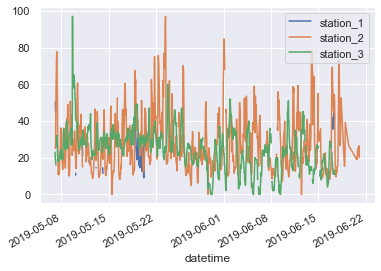

In [36]:
#Función plot - imprimir datos de estaciones
aq.plot()

<AxesSubplot:xlabel='datetime'>

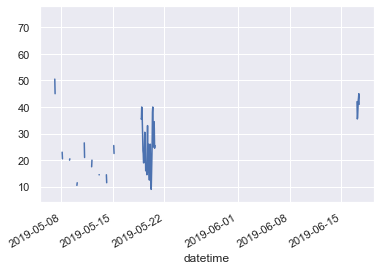

In [37]:
#Graficar una sola estación
aq["station_1"].plot()

* Registro de tiempo con muy pocos datos, solo existe un periodo constante registrado en torno al 22 de mayo del 2019.
* No se pueden obtener datos estadísticos válidos para esta estación. 

<AxesSubplot:xlabel='datetime'>

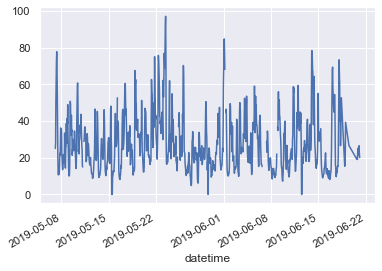

In [38]:
aq["station_2"].plot()

* Ahora tenemos un periodo de registros mucho más constantes y prometedores
* La estadística de esta estación es mucho más representativa. 

Modificando el tamaño del Grafico

<AxesSubplot:xlabel='datetime'>

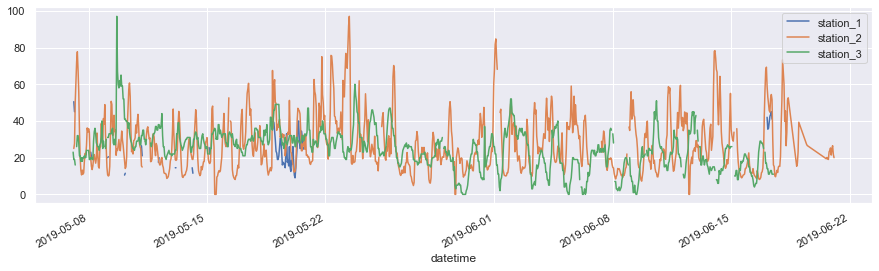

In [43]:
#Definimos el tamaño del gráfico. 
fix,ax = plt.subplots(figsize=(15,4))
#Hacemos que el gráfico se presente en nuestro lienzo. 
aq.plot(ax=ax)

<AxesSubplot:xlabel='datetime'>

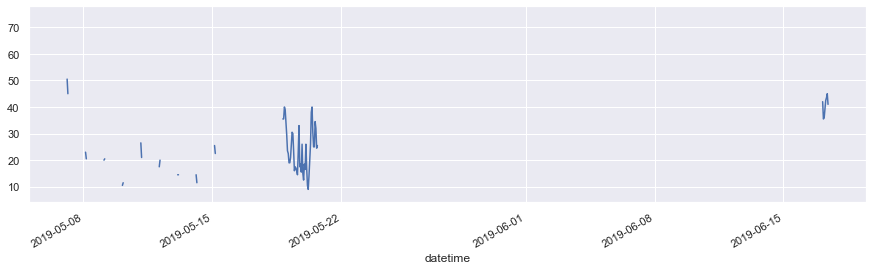

In [44]:
#Estación Número 1
fix,ax = plt.subplots(figsize=(15,4))
aq["station_1"].plot(ax=ax)

<AxesSubplot:xlabel='datetime'>

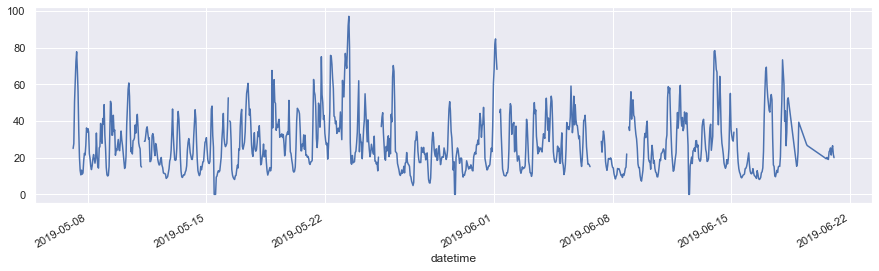

In [45]:
#Estación Número 2
fix,ax = plt.subplots(figsize=(15,4))
aq["station_2"].plot(ax=ax)

<AxesSubplot:xlabel='datetime'>

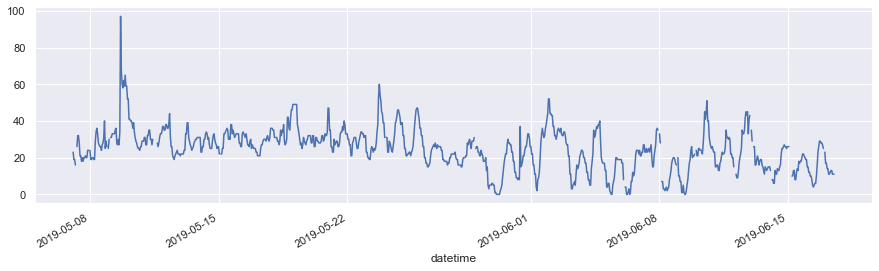

In [46]:
#Estación Número 3
fix,ax = plt.subplots(figsize=(15,4))
aq["station_3"].plot(ax=ax)

* Sin embargo podemos resumir lo anterior en una sola línea de la siguiente forma:

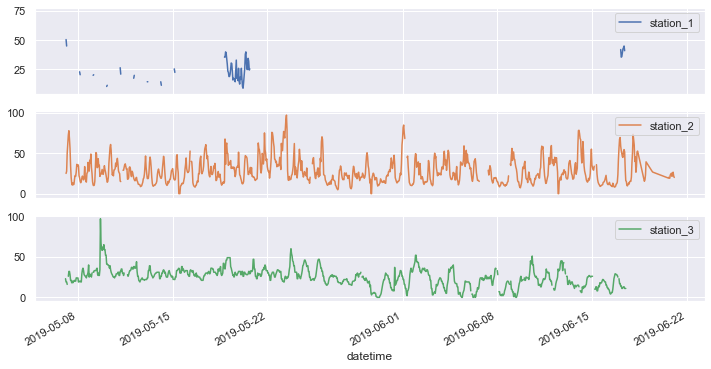

In [47]:
#Imprimir cada una de las columnas en gráficos aparte
gr_1 = aq.plot(figsize=(12,6),subplots=True)
#subplots = True, hace la magia por cada columna del dataframe

# Diagrama de Puntos

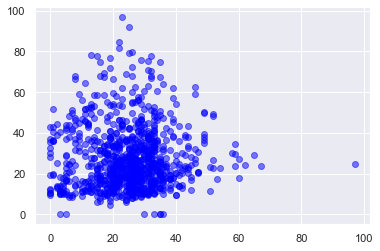

In [52]:
plt.scatter(aq["station_3"],aq["station_2"],color="blue",alpha=0.5)

<AxesSubplot:xlabel='datetime'>

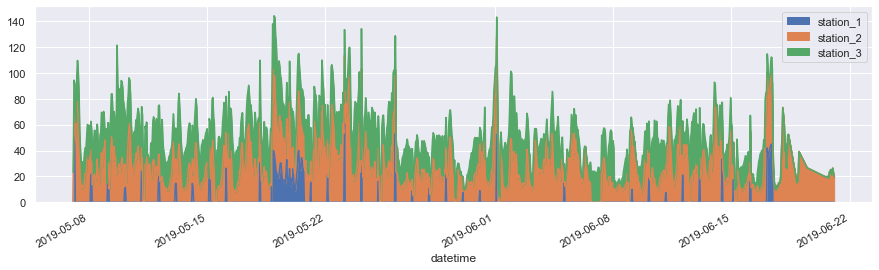

In [53]:
#Nos muestra un gráfico Nuevamente pero en este caso se sombre el area bajo la línea.
fix,ax = plt.subplots(figsize=(15,4))
aq.plot.area(ax=ax)

<AxesSubplot:>

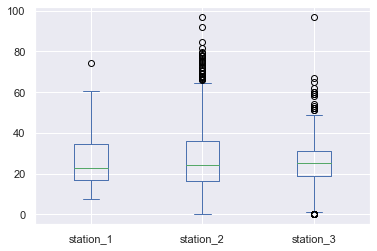

In [54]:
#Construir diagrama de cajas o boxplot
aq.plot.box()